## Exercice 

### 1. Using `np.random.normal()`, generate a gaussian distribution of 100k points, centered around 0, with a std. 2

### 2. Plot this distribution into an histogram 

### 3. Plot the "theory" curve on top of it 

### 4. Find the fwhm (full width at half maximum) of the distribution 
### 4bis. Compare with the theoritical value

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
mean = 0 
sig = 2 
N = 100_000

data = np.random.normal(mean, sig, N)
print(data.shape)

(100000,)


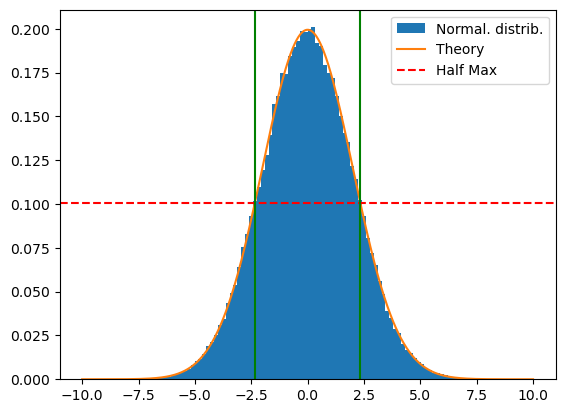

In [27]:
counts, bins, _ = plt.hist(data, bins=100, label="Normal. distrib.", density=True)
# density=True argument nomalizes the histogram
# ie the integral is now equal to 1
# what happens under the hood is dividing all bins by Integral(Original_Histogram)

bin_centers = 0.5 * (bins[:-1] + bins[1:])
counts_norm = counts / np.max(counts)
half_max = 0.5 

left_idx = np.argmin( np.abs(counts_norm[:np.argmax(counts_norm)] - half_max) )
right_idx = np.argmin( np.abs(counts_norm[np.argmax(counts_norm):] - half_max) )

x1 = bin_centers[left_idx]
x2 = bin_centers[np.argmax(counts_norm) + right_idx]

x = np.linspace(-10, 10, 1000)
gaussian_th = (1 / (sig * np.sqrt(2*np.pi))) * np.exp(-(x-mean)**2 / (2*sig**2))
#print(gaussian_th)

plt.plot(x, gaussian_th, label="Theory")
plt.axhline(0.5*np.max(counts), linestyle="--", color="red", label= "Half Max")
plt.axvline(x1, color="g")
plt.axvline(x2, color="g")
plt.legend();

In [31]:
fwhm_th = 2 * np.sqrt(2 * np.log(2)) * sig
print(f"The computed value is {(x2-x1):.2f}")
print(f"The th. value is {fwhm_th:.2f}")

The computed value is 4.67
The th. value is 4.71
